# Lab 2: Pandas for data analytics

## Purpose:To learn basic Pandas functions for data analytics.

**Link to kaddle dataset: 
https://www.kaggle.com/datasets/kaggle/us-baby-names**

In [1]:
# find variant for lab2
n = 17
N = (n + 4 ) % 5 + 1
print(f"Olga Tsyban's variant : {N}")

Olga Tsyban's variant : 2


#### Acording to the 2nd variant : 3, 4, 5, 8, 9,11,12,13,14,16,17,18, 19, 20, 22, 23, 24, 27

In [3]:
# all imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [3]:
# Read data from file to df
file_name = 'NationalNames.csv'
df = pd.read_csv(file_name)


print(df.head())

   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746


In [6]:
"""Task 3
    Отримайте імена стовпців набору даних"""
print(df.columns)

columns_names = list(df.columns)
for col in columns_names:
    print(col)

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')
Id
Name
Year
Gender
Count


In [9]:
"""Task 4
    Отримайте загальну(статичну) інформацію про дані у наборі даних."""
df.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


In [14]:
"""Task 5
    Знайдіть кількість унікальних імен у наборі даних
"""
# df['Name'].unique() - unique values

df['Name'].nunique()

93889

In [18]:
"""Task 8
    Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для якого Count максимальне)"""
year = 1947
df_year = df[df['Year'] == year]
most_popular_name = df_year.loc[df_year['Count'].idxmax(), 'Name']
print(f'The name in {year} is {most_popular_name}')

The name in 1947 is Linda


In [20]:
"""Task 9
    Підрахуйте кількість записів, для яких Count - мінімальне у наборі."""
min_count = df['Count'].min()
min_count_records = df[df['Count'] == min_count].shape[0] 
print(f'Records Amount з min Count value: {min_count_records}')

Records Amount з min Count value: 254615


In [21]:
"""Task 11
    Знайдіть рік із найбільшою кількістю унікальних імен"""
unique_names_per_year = df.groupby('Year')['Name'].nunique()

year_with_most_unique_names = unique_names_per_year.idxmax()
max_unique_names = unique_names_per_year.max()

print(f"Year with max amount of unique names: {year_with_most_unique_names}")
print(f"Amount of unique names: {max_unique_names}")

Year with max amount of unique names: 2008
Amount of unique names: 32488


In [25]:
"""Task 12
    Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році)"""
year_2008 = df[df['Year'] == 2008]
most_popular_name_2008 = year_2008.loc[year_2008['Count'].idxmax()]
print(f"most popular name: {most_popular_name_2008.Name}")

most popular name: Jacob


In [42]:
"""Task 13
    Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих імен"""
name_jacob = df[(df['Name'] == 'Jacob' ) & (df['Gender'] == 'F')]
#print(name_jacob)
count_popular_name_jacob = name_jacob['Count'].max()
year_popular_name_jacob = name_jacob.loc[name_jacob['Count'].idxmax()]
print("records in table with num:", name_jacob['Count'].idxmax())
print(f"Name Jacob (F) was the most popular woman name in {year_popular_name_jacob.Year} with amount {count_popular_name_jacob}")

records in table with num: 1455556
Name Jacob (F) was the most popular woman name in 2004 with amount 171


In [46]:
"""Task 14
    Знайти рік із найбільшою кількістю гендерно нейтральних імен (однакові чоловічі та жіночі імена)"""

neutral_names_per_year = df.groupby(['Year', 'Name'])['Gender'].nunique().reset_index()
print(neutral_names_per_year)

neutral_names = neutral_names_per_year[neutral_names_per_year['Gender'] == 2]
print(neutral_names)

neutral_name_count_per_year = neutral_names.groupby('Year')['Name'].count().reset_index()
year_most_neutral_names = neutral_name_count_per_year.loc[neutral_name_count_per_year['Name'].idxmax()]

print(f"Year with the biggest amount of neutral names: {year_most_neutral_names['Year']}")
print(f"Amount of neutral names: {year_most_neutral_names['Name']}")


         Year      Name  Gender
0        1880     Aaron       1
1        1880        Ab       1
2        1880     Abbie       1
3        1880    Abbott       1
4        1880      Abby       1
...       ...       ...     ...
1664775  2014     Zyron       1
1664776  2014     Zyrus       1
1664777  2014   Zyshawn       1
1664778  2014  Zytaveon       1
1664779  2014     Zyyon       1

[1664780 rows x 3 columns]
         Year    Name  Gender
16       1880   Addie       2
65       1880   Allie       2
67       1880    Alma       2
76       1880   Alpha       2
84       1880    Alva       2
...       ...     ...     ...
1664697  2014   Zyair       2
1664700  2014  Zyaire       2
1664701  2014    Zyan       2
1664722  2014   Zyion       2
1664759  2014    Zyon       2

[160653 rows x 3 columns]
Year with the biggest amount of neutral names: 2008
Amount of neutral names: 2557


In [54]:
"""Task 16
    Знайдіть рік, коли народилося найбільше дітей"""

birth_counts = df.groupby('Year')['Count'].sum()  

max_birth_year = birth_counts.idxmax()
max_birth_count = birth_counts.max()

print(f'The year with the most births is {max_birth_year} with {max_birth_count} children born.')

The year with the most births is 1957 with 4200026 children born.


In [5]:
"""Task 17
    Знайдіть кількість дівчаток та хлопчиків, які народились кожного року"""

gender_counts_per_year = df.groupby(['Year', 'Gender'])['Count'].sum().reset_index()

gender_counts_per_year.columns = ['Year', 'Gender', 'Count']

gender_pivot = gender_counts_per_year.pivot_table(index='Year', columns='Gender', values='Count', fill_value=0)
gender_pivot.columns = ['Female', 'Male']
print(gender_pivot)

       Female     Male
Year                  
1880    90993   110491
1881    91954   100745
1882   107850   113688
1883   112321   104629
1884   129022   114445
...       ...      ...
2010  1772738  1913851
2011  1753500  1893230
2012  1753922  1889414
2013  1745339  1881463
2014  1768775  1901376

[135 rows x 2 columns]


In [6]:
"""Task 18
    Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків."""
years_more_girls = gender_pivot[gender_pivot['Female'] > gender_pivot['Male']]

count_years_more_girls = len(years_more_girls)
print(f"The number of years when girls were born more than boys: {count_years_more_girls}")

The number of years when girls were born more than boys: 54


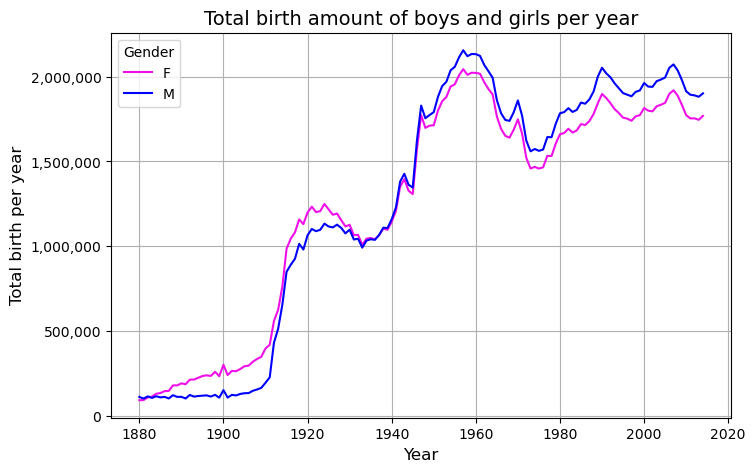

In [25]:
"""Task 19
    Накресліть графік загальної кількості народжень хлопчиків та дівчаток на рік."""
plt.figure(figsize=(8, 5))

plt.plot(gender_pivot.index, gender_pivot['F'], label='F', color='#F00FE9')
plt.plot(gender_pivot.index, gender_pivot['M'], label='M', color='blue')

plt.title('Total birth amount of boys and girls per year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total birth per year', fontsize=12)
# Set y-axis to show values as integers with commas (e.g., 500,000)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.legend(title="Gender")
plt.grid(True)

plt.show()

In [30]:
"""Task 20
    Підрахуйте кількість гендерно нейтральних імен (однакових для дівчат та хлопців)"""
neutral_names = df.groupby('Name')['Gender'].nunique()

gender_neutral_names = neutral_names[neutral_names == 2]

gender_neutral_count = gender_neutral_names.count()

print(f"Amount of neutral names: {gender_neutral_count}")


Amount of neutral names: 10221


In [29]:
"""Task 22
     Підрахуйте скільки років проводилось спостереження"""
min_year = df['Year'].min()
max_year = df['Year'].max()

result_rears = max_year - min_year + 1

print(f"Year's Amount of observation: {result_rears}")

Year's Amount of observation: 135


In [7]:
"""Task 23
    Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року)"""
neutral_names = df.groupby(['Year', 'Name'])['Gender'].nunique()
neutral_names = neutral_names[neutral_names > 1].reset_index()

years_of_observation = df['Year'].nunique()
popular_neutral_names = neutral_names.groupby('Name')['Year'].nunique()
popular_neutral_names = popular_neutral_names[popular_neutral_names == years_of_observation].index

total_births_neutral_names = df[df['Name'].isin(popular_neutral_names)].groupby('Name')['Count'].sum().sort_values(ascending=False)

print("The most popular gender-neutral names:")
print(total_births_neutral_names)

The most popular gender-neutral names:
Name
James      5129096
John       5106590
Robert     4816785
William    4071368
Joseph     2580687
Jean        480901
Jesse       421406
Leslie      376587
Francis     312147
Lee         291691
Jessie      274931
Marion      259549
Johnnie     149953
Sidney      105185
Ollie        56482
Tommie       51315
Name: Count, dtype: int64


In [63]:
"""Task 24
    Знайти найпопулярніше серед непопулярних імен (непопулярне ім’я, яким називали дітей найбільшу кількість разів )""
"""
name_counts = df.groupby('Name')['Count'].sum().reset_index()

unpopular_threshold = 161
unpopular_names = name_counts[name_counts['Count'] < unpopular_threshold]
print(unpopular_names)
print(unpopular_name[unpopular_name['Name'] == 'Celester'])

most_popular_unpopular_name = unpopular_names.sort_values(by='Count', ascending=False)

# Get the top result
if not most_popular_unpopular_name.empty:
    result = most_popular_unpopular_name.iloc[0]
    print(f"The most popular among unpopular names is '{result['Name']}' with a total count of {result['Count']}.")
else:
    print("No unpopular names found based on the given threshold.")

            Name  Count
0          Aaban     72
1          Aabha     21
2          Aabid      5
3      Aabriella     10
5          Aadan    112
...          ...    ...
93884  Zytavious     43
93885     Zyvion      5
93886    Zyyanna      6
93887      Zyyon      6
93888      Zzyzx      5

[65483 rows x 2 columns]
           Name  Count
14862  Celester    401
The most popular among unpopular names is 'Gurshan' with a total count of 160.


In [10]:
filtered_df = df[df['Count'] == 5]

# year count with Count = 5
name_year_counts = filtered_df.groupby('Name')['Year'].nunique().reset_index()
print(name_year_counts[name_year_counts['Name'] == 'Celester'])

most_popular_unpopular_name = name_year_counts.sort_values(by='Year', ascending=False).iloc[0]

print(f"The most popular 'unpopular' name (with Count = 5) that appeared in the most years is '{most_popular_unpopular_name['Name']}' with {most_popular_unpopular_name['Year']} years.")


           Name  Year
12207  Celester    29
The most popular 'unpopular' name (with Count = 5) that appeared in the most years is 'Ebbie' with 30 years.


In [53]:
unpopular_names = df[df['Count'] <= 160]
most_popular_unpopular_name = unpopular_names.sort_values(by='Count', ascending=False).head(1)
print(most_popular_unpopular_name)
print(f"Найпопулярніше серед непопулярних імен: {most_popular_unpopular_name['Name'].values[0]}. Ним називали {most_popular_unpopular_name['Count'].values[0]} разів")

            Id       Name  Year Gender  Count
527024  527025  Bernadine  1956      F    160
Найпопулярніше серед непопулярних імен: Bernadine. Ним називали 160 разів


In [45]:
"""Task 27
    Знайти найпопулярніші імена в кожному році."""
popular_names = df.loc[df.groupby('Year')['Count'].idxmax()]

print(popular_names[['Year', 'Name', 'Count']])

         Year      Name  Count
942      1880      John   9655
2938     1881      John   8769
4963     1882      John   9557
7116     1883      John   8894
9318     1884      John   9388
...       ...       ...    ...
1657592  2010  Isabella  22883
1691633  2011    Sophia  21816
1725502  2012    Sophia  22267
1759186  2013    Sophia  21147
1792389  2014      Emma  20799

[135 rows x 3 columns]


## Link to GitHub: [Lab2](https://github.com/OlgaTsuban/Python_university)

## Link to Nbviever: [Lab2](https://nbviewer.org/github/OlgaTsuban/Python_university/blob/main/Python_lab2_Tsyban_Olga/Python_lab2_TsybanOlga_KN222A.ipynb)